<a href="https://colab.research.google.com/github/bala-codes/FAKE-VS-REAL-NEWS-CLASSIFIER-USING-ML-AND-DL-MODELS/blob/master/codes%20(ML)/Part%201%20of%20Fake%20News%20Classifier%20Training%20and%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IF YOU ARE USING GOOGLE COLABORATORY AND IF YOUR DATA IS STORED IN GOOGLE DRIVE, THEN RUN THIS CODE OTHERWISE DON'T EXECUTE

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Importing the libraries which are required.

import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

#  HERE I AM USING MY OWN CSV FILE, IF YOU HAVE YOU OWN FILE (.CSV) FORMAT , GIVE THE BELOW DF INPUT AS YOUR FILE INPUT.

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/finalexcel.xlsx') # If you have your input file as .xlsx (excel sheet) format
#df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/fakerealnews.csv') # If you have your input file as .csv format
df = pd.DataFrame(df)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 2 columns):
text     7701 non-null object
label    7703 non-null object
dtypes: object(2)
memory usage: 120.5+ KB


In [ ]:
df.shape

(7703, 2)

In [ ]:
df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
FAKE   3368   3266                                                      34
REAL   4333   3685  Killing Obama administration rules, dismantlin...   58

# IF YOU DON'T SEE ANY VERTICAL BAR IN THE BELOW GRAPH, THEN YOU DON'T HAVE ANY MISSING VALUES IN ANY OF THE FIELDS

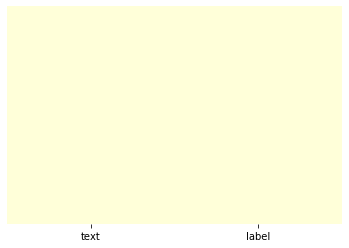

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

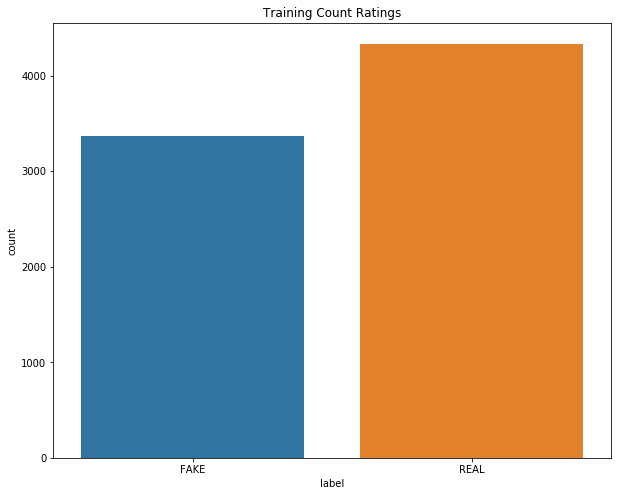

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Training Count Ratings')
sns.countplot(df['label'])
plt.show()

# HERE WE DROP ALL THE DUPLICATES ROWS IF EXISTS IN THE DATAFRAME

In [ ]:
df.drop_duplicates(inplace = True)
df.dropna(inplace=True)

In [ ]:
df = pd.DataFrame(df)


In [ ]:
def word_count(sentence):
  return len(sentence.split())

df['word count'] = df['text'].apply(word_count)
df.head()

,text,label,word count
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404
4,It's primary day in New York and front-runners...,REAL,317


In [ ]:
import matplotlib.pyplot as plt
x = df['word count'][df.label == 'REAL']
y = df['word count'][df.label == 'FAKE']
x.head()

2     431
4     317
7     123
8    2354
9     710
Name: word count, dtype: int64

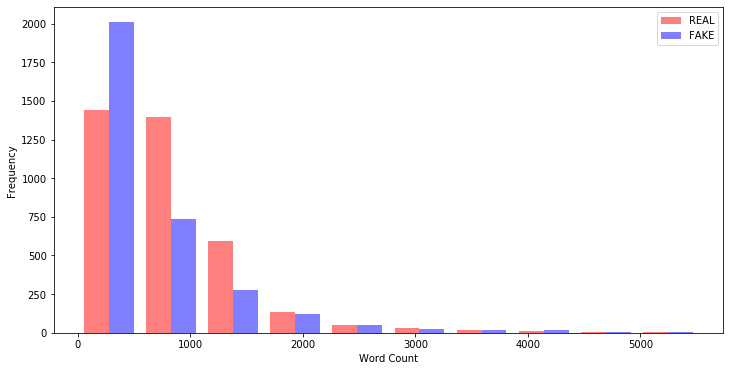

In [ ]:
# Plotting the word count distribution for both FAKE and REAL news
plt.figure(figsize = (12,6))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
g =plt.hist([x, y],color = ['r','b'], alpha = 0.5,label = ['REAL','FAKE'])
plt.legend(loc = 'upper right')
plt.show()

# THE BELOW SET OF FUNCTIONS CLEANS YOUR CODE . I.E FROM PUNCTUATION REMOVAL , STOPWORDS REMOVAL , STEMMING PROCESS , LEMMATIZATION PROCESS

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

from bs4 import BeautifulSoup
lemmer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
def text_cleaner2(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])  
    newString = ' '.join([lemmer.lemmatize(word,'v') for word in newString.split()])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

In [ ]:
def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

In [ ]:
lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])

In [ ]:
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw.lower()))
    return lem(cleaned_text)

In [ ]:
%%time
df['SECTION_CLEANED_CONT'] = df['text'].apply(text_cleaner2)
df['SECTION_CLEANED'] = df['text'].apply(text_cleaner)

CPU times: user 6min 45s, sys: 41.6 s, total: 7min 27s
Wall time: 7min 27s


In [ ]:
# SAVE THE FINAL CLEANED COPY IF YOU WANT IN EXCEL 
#df.to_excel("output.xlsx") 

# SAVE THE FINAL CLEANED COPY IF YOU WANT IN CSV
df.to_csv("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/dfcleanedascsv.csv")  # SAVE THE FINAL CLEANED COPY IF YOU WANT 
df.head()


,text,label,word count,SECTION_CLEANED_CONT,SECTION_CLEANED
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,431,secretary state john kerry say monday stop par...,us secretary state john f kerry say monday sto...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404,kaydee king november lesson tonight dem losses...,— kaydee king kaydeeking november 9 2016 lesso...
4,It's primary day in New York and front-runners...,REAL,317,primary day new york front runners hillary cli...,primary day new york frontrunners hillary clin...


In [ ]:
# df = pd.read_csv('/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/FAKE VS REAL NEWS - FINAL DATASETS/dfcleanedascsv.csv', index=False)
df = pd.DataFrame(df)
#df.head()

In [ ]:
# Displaying the most common words in the dataset
import collections
#from counter import Counter

df['SECTION_CLEANED'] = df['SECTION_CLEANED'].astype(str)
all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('say', 32713),
 ('trump', 23316),
 ('state', 15805),
 ('clinton', 14896),
 ('would', 12951),
 ('us', 12615),
 ('people', 11869),
 ('one', 11438),
 ('make', 10773),
 ('go', 10064)]

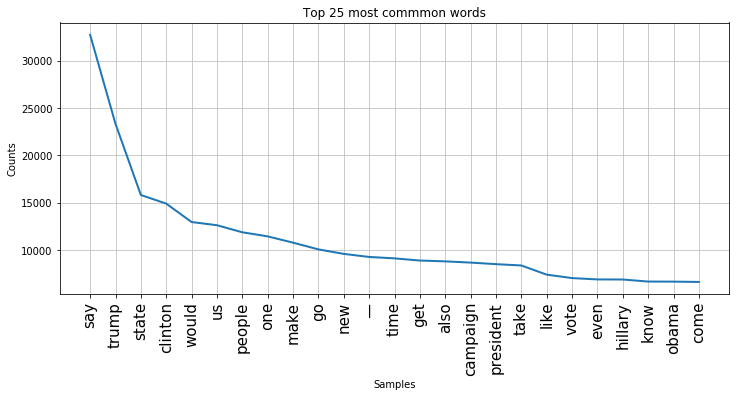

In [ ]:
#Plotting the word frequency distribution of first couple of words

plt.figure(figsize=(12,5))
plt.title('Top 25 most commmon words')
plt.xticks(fontsize=15,rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)


In [ ]:
!pip install WordCloud

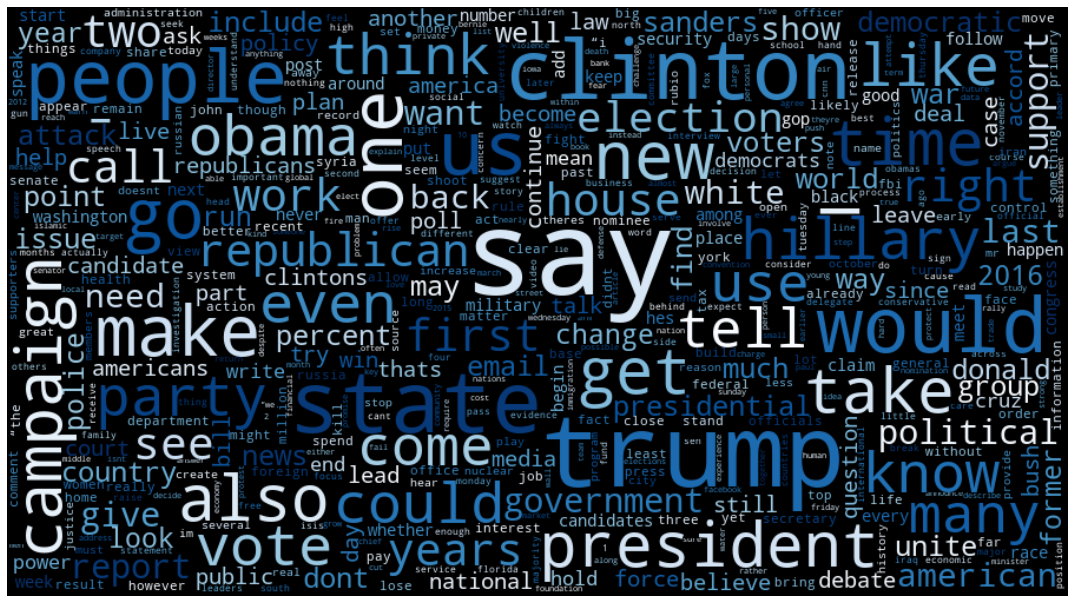

In [ ]:
# Creating a word Cloud
from wordcloud import WordCloud
import collections

all_words = []

for line in list(df['SECTION_CLEANED']):
  words = line.split()
  for word in words:
    all_words.append(word.lower())

wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['SECTION_CLEANED'],df['label'],test_size=0.20,random_state=87) # rs = 77(88)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words = "english")
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [ ]:
print(count_train)
print('\n')
print("feature_names",count_vectorizer.get_feature_names()[:10])

  (0, 56803)	1
  (0, 43008)	1
  (0, 36132)	11
  (0, 47452)	6
  (0, 41282)	1
  (0, 47740)	2
  (0, 1613)	1
  (0, 25768)	1
  (0, 73262)	2
  (0, 22351)	3
  (0, 17852)	1
  (0, 28016)	1
  (0, 40893)	2
  (0, 66258)	1
  (0, 63336)	2
  (0, 69455)	2
  (0, 4954)	3
  (0, 24444)	2
  (0, 25393)	1
  (0, 59080)	1
  (0, 68278)	1
  (0, 5037)	2
  (0, 17749)	1
  (0, 63132)	1
  (0, 22364)	3
  :	:
  (5559, 9565)	1
  (5559, 16272)	1
  (5559, 18940)	1
  (5559, 53434)	1
  (5559, 11995)	1
  (5559, 10268)	1
  (5559, 45880)	2
  (5559, 11476)	1
  (5559, 62017)	1
  (5559, 54306)	1
  (5559, 67867)	1
  (5559, 23375)	1
  (5559, 35748)	1
  (5559, 74074)	1
  (5559, 71677)	1
  (5559, 21155)	1
  (5559, 55301)	1
  (5559, 7679)	2
  (5559, 14011)	4
  (5559, 38650)	3
  (5559, 9095)	1
  (5559, 62325)	1
  (5559, 4946)	1
  (5559, 73803)	1
  (5559, 41339)	1


feature_names ['00', '000', '0000', '0000000031', '000000031', '0000035', '00001400', '00006', '00011', '00017b2908ff9fa45188d243fd49aaeeb2dhrcofficecom']


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, ngram_range=(1,2))
tfidf_train = tfidf_vectorizer.fit(X_train.values)
tfidf_train = tfidf_vectorizer.transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train)
#this command gives importance for each and every word
print(tfidf_train[0:3])

  (0, 1298839)	0.03512315272404122
  (0, 1298721)	0.018485346752058963
  (0, 1294245)	0.03807869579847286
  (0, 1294226)	0.028260594223868597
  (0, 1293830)	0.03080973971097118
  (0, 1292460)	0.06547396095109112
  (0, 1292428)	0.024977841861763692
  (0, 1292157)	0.03807869579847286
  (0, 1290848)	0.031665388988423956
  (0, 1290725)	0.019066871478459122
  (0, 1286104)	0.03807869579847286
  (0, 1286044)	0.03807869579847286
  (0, 1285997)	0.03807869579847286
  (0, 1285982)	0.03807869579847286
  (0, 1285886)	0.06442132731722837
  (0, 1285716)	0.03216760964960957
  (0, 1285712)	0.03807869579847286
  (0, 1285660)	0.033570550897674044
  (0, 1284354)	0.03339427085623258
  (0, 1284095)	0.03807869579847286
  (0, 1282944)	0.01942247640717773
  (0, 1282523)	0.03807869579847286
  (0, 1282188)	0.016243092476989733
  (0, 1282011)	0.03807869579847286
  (0, 1281296)	0.031216137298300247
  :	:
  (5559, 34537)	0.03137576049974564
  (5559, 34497)	0.03137576049974564
  (5559, 34435)	0.03246064662644332
  (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



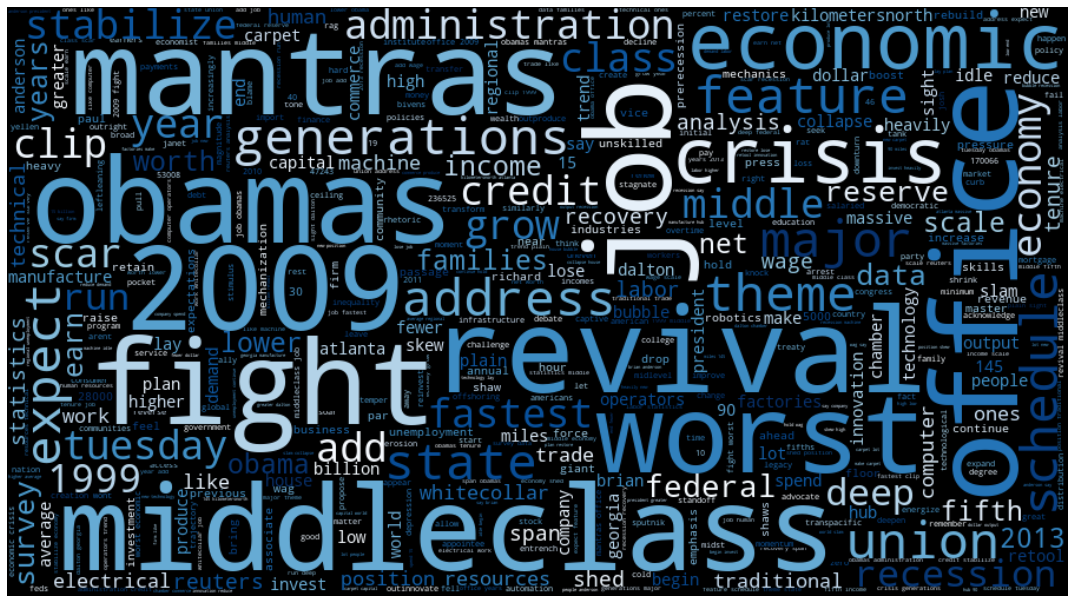

In [ ]:
all_words = []
print(tfidf_vectorizer.vocabulary_)
for k,v in (tfidf_vectorizer.vocabulary_).items():
  all_words.append(k)


wordfreq = collections.Counter(all_words)
wordcloud = WordCloud(width=900,height=500, max_words=500, max_font_size=100, relative_scaling=0.5, colormap='Blues',
                      normalize_plurals = True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(19,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
len(tfidf_vectorizer.vocabulary_) #1300819 NEARLY

1300819

# In the next code , kindly check the alpha values for which you get more accuracy and provide that accuracy in the hyperparameter section of our Naive Bayes model

In [ ]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2020-01-24 06:24:47


# NAIVE BAYES CLASSIFIER

In [ ]:
#USING NAIVE BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB(alpha=0.1)

nb_classifier.fit(tfidf_train,y_train)
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

Score from TFIDF Vectorizer 85.334 %
[[454 171]
 [ 33 733]]


'Score from TFIDF Vectorizer 85.622 %\n[[454 171]\n [ 33 733]]'

In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0
Score:  0.8605319913731129

Alpha:  0.1


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8533429187634796

Alpha:  0.2
Score:  0.8411214953271028

Alpha:  0.30000000000000004
Score:  0.8173975557153127

Alpha:  0.4
Score:  0.8037383177570093

Alpha:  0.5
Score:  0.792235801581596

Alpha:  0.6000000000000001
Score:  0.783608914450036

Alpha:  0.7000000000000001
Score:  0.7764198418404026

Alpha:  0.8
Score:  0.7663551401869159

Alpha:  0.9
Score:  0.7570093457943925



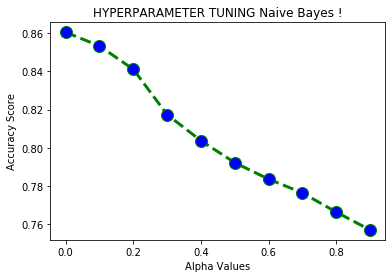

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Naive Bayes !') 
plt.show() 


# Bernoulli's Bayes

In [ ]:
#USING Bernoulli BAYES MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

bb_classifier = BernoulliNB(alpha=0.0)

bb_classifier.fit(tfidf_train,y_train)
pred = bb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

Score from TFIDF Vectorizer 86.413 %
[[501 124]
 [ 65 701]]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = np.arange(0, 1, 0.1)
scores = []

# Define train_and_predict()
def train_and_predict(alpha):

    bb_classifier = BernoulliNB(alpha=alpha)
    bb_classifier.fit(tfidf_train, y_train)
    pred = bb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8634076204169662

Alpha:  0.1
Score:  0.8274622573687994

Alpha:  0.2
Score:  0.8152408339324227

Alpha:  0.30000000000000004
Score:  0.8109273903666427

Alpha:  0.4
Score:  0.8080517613227893

Alpha:  0.5
Score:  0.8066139468008627

Alpha:  0.6000000000000001
Score:  0.8087706685837527

Alpha:  0.7000000000000001
Score:  0.8109273903666427

Alpha:  0.8
Score:  0.8130841121495327

Alpha:  0.9
Score:  0.8159597411933861



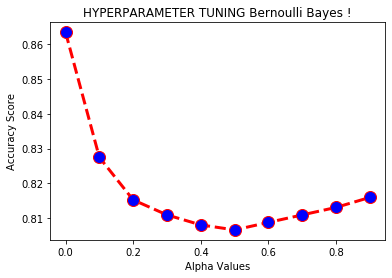

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.plot(x, y, color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('Alpha Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Bernoulli Bayes !') 
plt.show() 

# PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
#USING PASSIVE AGGRESSIVE MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics

PA_classifier = PassiveAggressiveClassifier(max_iter=1000)

PA_classifier.fit(tfidf_train,y_train)
pred = PA_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

Score from TFIDF Vectorizer 89.863 %
[[573  52]
 [ 89 677]]


In [ ]:
# Create the list of alphas: alphas for tfidf
import numpy as np

alphas = [50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000]
scores = []
# Define train_and_predict()
def train_and_predict(alpha):

    PA_classifier = PassiveAggressiveClassifier(max_iter=alpha)
    PA_classifier.fit(tfidf_train, y_train)
    pred = PA_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)

    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  50
Score:  0.901509705248023

Alpha:  100
Score:  0.9029475197699497

Alpha:  150
Score:  0.9007907979870596

Alpha:  200
Score:  0.895039539899353

Alpha:  250
Score:  0.9029475197699497

Alpha:  300
Score:  0.9022286125089863

Alpha:  350
Score:  0.8986340762041697

Alpha:  400
Score:  0.897196261682243

Alpha:  450
Score:  0.9000718907260963

Alpha:  500
Score:  0.8964773544212796

Alpha:  600
Score:  0.899352983465133

Alpha:  700
Score:  0.8986340762041697

Alpha:  800
Score:  0.899352983465133

Alpha:  900
Score:  0.901509705248023

Alpha:  1000
Score:  0.9000718907260963



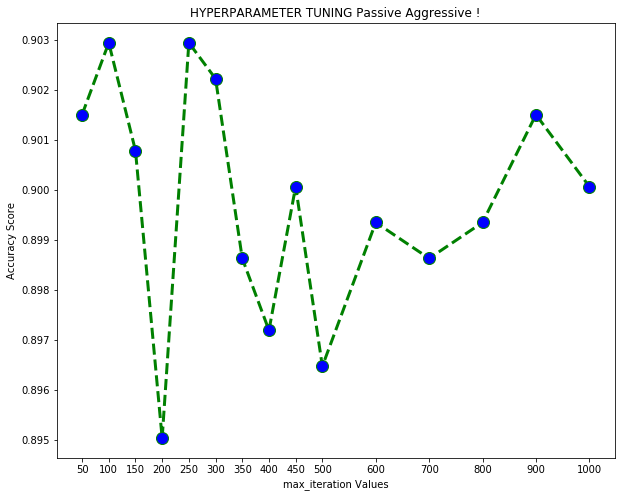

In [ ]:
import matplotlib.pyplot as plt 

x = list(alphas)
y = scores 

# plotting the points 
plt.figure(figsize=(10,8))
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('max_iteration Values') 
plt.ylabel('Accuracy Score')
plt.xticks((50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000))
plt.title('HYPERPARAMETER TUNING Passive Aggressive !') 
plt.show() 

# SGD CLASSIFIER

In [1]:
%%time

# Run this code once to get the best parameters for SGD Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.
# SGD classifier - finding best parameters using Grid Search CV
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    "penalty" : ["l2", "l1", "none"],
    "max_iter" : [5, 10, 20, 50, 100, 1000]
}
m
model = SGDClassifier()
SGD_classifier = GridSearchCV(model, param_grid=params)
SGD_classifier.fit(tfidf_train, y_train)

print(SGD_classifier.best_score_)
print(SGD_classifier.best_estimator_)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


'\n# Run this code once to get the best parameters for SGD Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.\n# SGD classifier - finding best parameters using Grid Search CV\nfrom sklearn.model_selection import GridSearchCV\n\nparams = {\n    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],\n    \'alpha\': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],\n    "penalty" : ["l2", "l1", "none"],\n    "max_iter" : [5, 10, 20, 50, 100, 1000]\n}\nm\nmodel = SGDClassifier()\nSGD_classifier = GridSearchCV(model, param_grid=params)\nSGD_classifier.fit(tfidf_train, y_train)\n\nprint(SGD_classifier.best_score_)\nprint(SGD_classifier.best_estimator_) '

In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

SGD_classifier = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

SGD_classifier.fit(tfidf_train,y_train)
pred = SGD_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

Score from TFIDF Vectorizer 90.654 %
[[566  59]
 [ 71 695]]


# SUPPORT VECTOR MACHINES (LINEAR AND NON-LINEAR)

In [ ]:
%%time

# Run this code once to get the best parameters for SVC Classifier amd use the parameters later. Run this code again only if you are changing the dataset, otherwise stick with the next block of code.

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

params = {
    "loss" : ["hinge", "squared_hinge"],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
}

model = LinearSVC(class_weight = 'balanced')
svc = GridSearchCV(model, param_grid=params)
svc.fit(tfidf_train, y_train)

print("BEST SCORE FROM SVC", svc.best_score_)
print("BEST PARAMETERS FOR SVC",svc.best_estimator_)  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


BEST SCORE FROM SVC 0.8942446043165467
BEST PARAMETERS FOR SVC LinearSVC(C=100, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
CPU times: user 2min 4s, sys: 80.5 ms, total: 2min 4s
Wall time: 2min 4s


In [ ]:
#USING SGD MODEL TO PREDICT ON TFIDFVECTORIZER CALCULATED VALUES

from sklearn.svm import LinearSVC
from sklearn import metrics

SVC_classifier = LinearSVC(C=100, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

SVC_classifier.fit(tfidf_train,y_train)
pred = SVC_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

Score from TFIDF Vectorizer 90.798 %
[[569  56]
 [ 72 694]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
                     
SVC_N_classifier = SVC(kernel = 'linear', C = 1, class_weight='balanced', probability=True)

SVC_N_classifier.fit(tfidf_train,y_train)
pred = SVC_N_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)


Score from TFIDF Vectorizer 90.798 %
[[566  59]
 [ 69 697]]


# LOGISTIC REGRESSION

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg_classifier = LogisticRegression(C=1000)

logreg_classifier.fit(tfidf_train,y_train)
pred = logreg_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score from TFIDF Vectorizer 90.439 %
[[563  62]
 [ 71 695]]


In [ ]:
import numpy as np

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
# Define train_and_predict()
def train_and_predict(C):

    logreg_classifier = LogisticRegression(C=C)
    logreg_classifier.fit(tfidf_train, y_train)
    pred = logreg_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append(score)
    return score

# Iterate over the alphas and print the corresponding score
for c in C:
    print('C value: ', c)
    print('Score: ', train_and_predict(c))
    print()

C value:  0.001


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score:  0.5506829618979152

C value:  0.01
Score:  0.5585909417685119

C value:  0.1
Score:  0.8562185478073329

C value:  1
Score:  0.888569374550683

C value:  10
Score:  0.901509705248023

C value:  100
Score:  0.9051042415528396

C value:  1000
Score:  0.9043853342918764



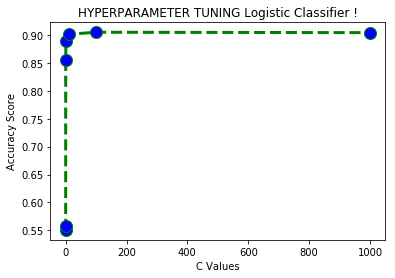

In [ ]:
import matplotlib.pyplot as plt 

x = C
y = scores 

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12) 
plt.xlabel('C Values') 
plt.ylabel('Accuracy Score') 
plt.title('HYPERPARAMETER TUNING Logistic Classifier !') 
plt.show() 

# Logistic Regression CV

In [ ]:
%%time
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

logregcv_classifier = LogisticRegressionCV(Cs=100)

logregcv_classifier.fit(tfidf_train,y_train)
pred = logregcv_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print("Score from TFIDF Vectorizer", round(score*100,3) ,"%")

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred, labels=['FAKE','REAL'])
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score from TFIDF Vectorizer 90.87 %
[[569  56]
 [ 71 695]]
CPU times: user 36min 6s, sys: 19min 52s, total: 55min 58s
Wall time: 30min 34s


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_
print("class_labels" , class_labels)
print(" ")
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()
print("feature_names" , feature_names)
print(" ")
print(type(feature_names))
  

class_labels ['FAKE' 'REAL']
 
feature_names 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
print(" ")

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


FAKE [(-14.472117293343754, '000'), (-14.472117293343754, '000 015'), (-14.472117293343754, '000 million'), (-14.472117293343754, '0000'), (-14.472117293343754, '0000 gmt'), (-14.472117293343754, '0000 messageid'), (-14.472117293343754, '0000 philippe'), (-14.472117293343754, '0000 received'), (-14.472117293343754, '0000 utc'), (-14.472117293343754, '0000035'), (-14.472117293343754, '0000035 se'), (-14.472117293343754, '00001400'), (-14.472117293343754, '00001400 vk'), (-14.472117293343754, '00011'), (-14.472117293343754, '00011 influence'), (-14.472117293343754, '00017b2908ff9fa45188d243fd49aaeeb2dhrcofficecom'), (-14.472117293343754, '00017b2908ff9fa45188d243fd49aaeeb2dhrcofficecom contenttype'), (-14.472117293343754, '00017b2908ff9fa45188d243fd49aaeeb2dhrcofficecom ehighlighter'), (-14.472117293343754, '0002'), (-14.472117293343754, '0002 followers')]
 
REAL [(-8.839524616354717, 'republicans'), (-8.831242303879296, 'voters'), (-8.810974037626563, 'house'), (-8.767524429570763, 'deb

# Trying out ensemble model for fake news classification

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
best_params = {'C': 1000, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2'}
logreg_classifier = LogisticRegression(**best_params, class_weight='balanced')
logreg_classifier.fit(tfidf_train,y_train)

best_params = {'alpha': 0.1} #0.001
nb_classifier = MultinomialNB(**best_params)
nb_classifier.fit(tfidf_train,y_train)

best_params = {'kernel': 'linear', 'C': 1}
SVC_N_classifier = SVC(**best_params, class_weight='balanced', probability=True)
SVC_N_classifier.fit(tfidf_train,y_train)

best_params = {'max_iter': 1000}
pac_classifier = PassiveAggressiveClassifier(**best_params)
pac_classifier.fit(tfidf_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 8min 14s, sys: 8.86 s, total: 8min 23s
Wall time: 8min 13s


In [ ]:
%%time
SGD_classifier = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
clf = SGD_classifier.fit(tfidf_train,y_train)
calibrator_classifier = CalibratedClassifierCV(clf, cv='prefit')
calibrator_classifier.fit(tfidf_train, y_train)

best_params = {'Cs': 100, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2'}
logregcv_classifier = LogisticRegressionCV(**best_params,class_weight='balanced')
logregcv_classifier.fit(tfidf_train,y_train)

SVC_classifier = LinearSVC(C=100, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
SVC_classifier.fit(tfidf_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


CPU times: user 37min 4s, sys: 24min 52s, total: 1h 1min 56s
Wall time: 34min 7s


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import pickle

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logreg_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, nb_classifier), fout)
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_N_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_N_classifier), fout)

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, SVC_classifier), fout)

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/pac_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, pac_classifier), fout)  
 
with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/calibrator_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, calibrator_classifier), fout)  

with open("/content/gdrive/My Drive/Machine Learning Projects/FAKE VS REAL NEWS CATEGORY CLASSIFIER PROJECT/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logregcv_classifier.pkl","wb") as fout:
  pickle.dump((tfidf_vectorizer, logregcv_classifier), fout)  


In [ ]:
from scipy.stats.mstats import mode
import numpy as np

def ensemble(x):
  pred1 = logreg_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = SVC_N_classifier.predict_proba(x)
  pred4 = pac_classifier._predict_proba_lr(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = logregcv_classifier.predict_proba(x)
  pred7 = SVC_classifier._predict_proba_lr(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6, pred7], axis=0)
  print("Test_Pred_Prob",test_pred_prob)
  pred = np.argmax(test_pred_prob, axis=1)
  return pred


In [ ]:
pred = []
pred = ensemble(tfidf_test)
pred = np.array(pred)

y_test = y_test.replace(to_replace = ['FAKE', 'REAL'], value = [0,1])

Test_Pred_Prob [[0.02610481 0.97389519]
 [0.70163503 0.29836497]
 [0.02269743 0.97730257]
 ...
 [0.04395594 0.95604406]
 [0.04336259 0.95663741]
 [0.0304068  0.9695932 ]]


# Our final Ensemble Score

In [ ]:
print(type(y_test))
score = metrics.accuracy_score(y_test,pred)
print("Score from ENSEMBLE", round(score*100,3) ,"%") # our accuracy is 90.76

<class 'pandas.core.series.Series'>
Score from ENSEMBLE 90.87 %


In [ ]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred)
print(cm)

[[566  59]
 [ 68 698]]


#  IF YOU WANT TO CATEGORIZE LOTS OF NEWS COLUMNS, JUST GIVE THE INPUT AS A DATAFRAME LIKE THE ABOVE 

# OR 

# EITHER GO TO PART 2 OF OUR CODE FILES FOR CHECK PREDICTION FOR SINGLE INPUT OR SIMPLE TEST HERE 

# ENTER THE NEWS COLUMN HERE TO PREDICT 'REAL' OR 'FAKE'

#FAKE NEWS AVAILABLE for US and India

https://newspunch.com/

http://www.fakingnews.com/